In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt            
%matplotlib inline     
sns.set(color_codes=True)

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
train_path = "/content/drive/Shareddrives/CSE258/clean_data/train.csv"
valid_path = "/content/drive/Shareddrives/CSE258/clean_data/valid.csv"
test_path = "/content/drive/Shareddrives/CSE258/clean_data/test.csv"

train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)
test_df = pd.read_csv(test_path)

dataset = pd.concat([train_df, valid_df, test_df])

train_df = None
valid_df = None
test_df = None

In [ ]:
dataset.drop(['paid', 'time'], axis = 1, inplace = True)

In [ ]:
dataset = dataset[['user', 'item', 'review', 'rating']]

## Simple Dataset Stats

In [ ]:
dataset.head()

,user,item,review,rating
0,karleigh,Fisher_Price_Loving_Family_Sweet_Sounds_Dollhouse,i researched and looked at all the fisher pric...,4.0
1,mfw1982,Nokia_E62_Smartphone,no it doesnt have a camera and yes the keys ar...,5.0
2,davydanger,pr-Dell_DJ_15GB_MP3_Player,i was very excited to buy this product given a...,1.0
3,kbmg,Blue_s_Clues_Bath_Time_Blue,my two kids ages 2 and 4 are big blues clues f...,2.0
4,pluckyduck,Spider_Man_Gloves,dad was walking through toys r us the other we...,3.0


In [ ]:
print("Number of datapoints: ", dataset.shape)

Number of datapoints:  (195410, 4)


In [ ]:
print("Unique user", dataset['user'].nunique())

Unique user 118183


In [ ]:
print("Unique items", dataset['item'].nunique())

Unique items 42739


## Rating Stats

In [ ]:
dataset['rating'].describe()

count    195410.000000
mean          3.629231
std           1.496651
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

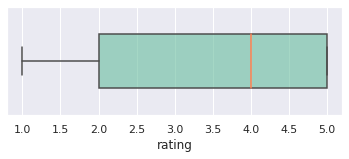

In [ ]:
sns.set(rc={'figure.figsize':(6,2)})
sns.boxplot(x=dataset["rating"], boxprops={"facecolor": (105/256, 190/256, 160/256, 0.6)}, medianprops={"color": "coral"}, width = .5)

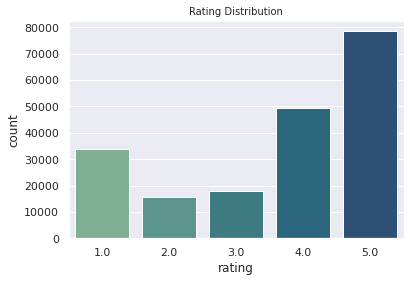

In [ ]:
sns.countplot(x = 'rating', palette='crest', data=dataset)
plt.title('Rating Distribution', size=10)
plt.show()

## User and item stat

In [ ]:
df_user = dataset.groupby('user').agg({'item':'count', 'rating':'mean'}).reset_index()

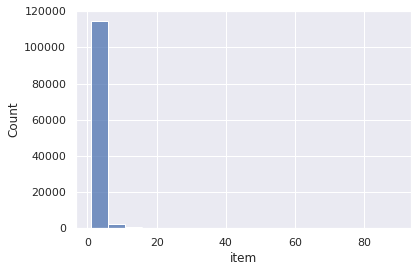

In [ ]:
sns.histplot(data = df_user["item"])

In [ ]:
df_user["item"].describe()

count    118183.000000
mean          1.653444
std           2.335953
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          89.000000
Name: item, dtype: float64

In [ ]:
df_item = dataset.groupby('item').agg({'user':'count', 'rating':'mean'}).reset_index()

In [ ]:
df_item["user"].describe()

count    42739.000000
mean         4.572147
std          9.199448
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        278.000000
Name: user, dtype: float64

## Word Count

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopword += ["bought", "purchased", "ive", "camera", "product", "review", "printer", "car", "wife", "husband", "son", "daughter", "dvd", "player", "th", "washer", "model", "vacuum", "phone", "machine"]
stopword = set(stopword)

In [ ]:
# for x in dataset.rating.unique():
wc = WordCloud(background_color="white", max_words=1000, stopwords=stopword, max_font_size=40, random_state=42, repeat = False)
wc.generate(dataset.review[(dataset.review.notnull()) & (dataset.rating == 5)].to_string())

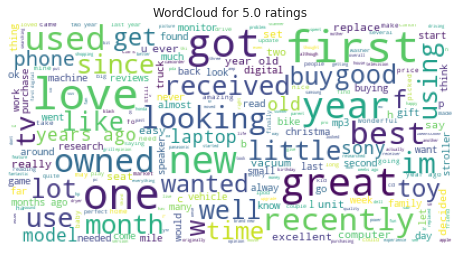

In [ ]:
plt.figure(figsize=(8, 10))
plt.imshow(wc)
plt.title("WordCloud for 5.0 ratings")
plt.axis("off")
plt.show()

In [ ]:
remove = set(["against", "above", "below", "up", "down", "off",  "over", "no", "nor", "not", "very", "don't", "didn't", "couldn't", "doesn't", "hasn't", "hadn't", "haven't", "isn't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"])
stopword = stopword.difference(remove)

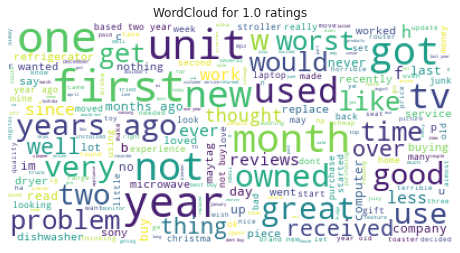

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, stopwords=stopword, max_font_size=40, random_state=42, repeat = False)
wc.generate(dataset.review[(dataset.review.notnull()) & (dataset.rating == 1)].to_string())
plt.figure(figsize=(8, 10))
plt.imshow(wc)
plt.title("WordCloud for 1.0 ratings")
plt.axis("off")
plt.show()